In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_of_trainImgs = x_train.shape[0] #60000 here
num_of_testImgs = x_test.shape[0] #10000 here
img_width = 28
img_height = 28
 
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)
input_shape = (img_height, img_width, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

data_generator = ImageDataGenerator(
                        rotation_range=10,
                        width_shift_range=0.25,
                        height_shift_range=0.25,
                        zoom_range=.5,
                        horizontal_flip=False)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, steps_per_epoch=len(x_train) // 128,
                        epochs=12, verbose=1,
                        validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('trained_model5.h5')
print("Done")

Epoch 1/20
468/468 [==============================] - 165s 353ms/step - loss: 1.3388 - accuracy: 0.5439 - val_loss: 0.2571 - val_accuracy: 0.9319
Epoch 2/20
468/468 [==============================] - 152s 325ms/step - loss: 0.7532 - accuracy: 0.7580 - val_loss: 0.1386 - val_accuracy: 0.9617
Epoch 3/20
468/468 [==============================] - 153s 326ms/step - loss: 0.6149 - accuracy: 0.8004 - val_loss: 0.1251 - val_accuracy: 0.9623
Epoch 4/20
468/468 [==============================] - 160s 343ms/step - loss: 0.5456 - accuracy: 0.8267 - val_loss: 0.0872 - val_accuracy: 0.9758
Epoch 5/20
468/468 [==============================] - 158s 337ms/step - loss: 0.4986 - accuracy: 0.8411 - val_loss: 0.0923 - val_accuracy: 0.9721
Epoch 6/20
468/468 [==============================] - 143s 306ms/step - loss: 0.4682 - accuracy: 0.8510 - val_loss: 0.0764 - val_accuracy: 0.9779
Epoch 7/20
468/468 [==============================] - 143s 305ms/step - loss: 0.4334 - accuracy: 0.8634 - val_loss: 0.0694 -

8


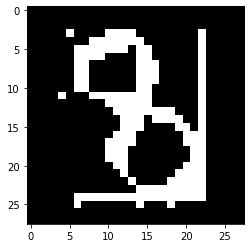

In [31]:
import numpy as np
import cv2
from skimage import img_as_ubyte, img_as_uint    
from skimage.color import rgb2gray
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('trained_model3.h5')

img_original = cv2.imread("recog_1.png")

img_gray = rgb2gray(img_original)
img_gray_u8 = img_as_ubyte(img_gray)
im_gray_u16 = img_as_uint(img_gray)

(thresh, im_binary) = cv2.threshold(im_gray_u16, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_resized = cv2.resize(im_binary,(28,28), interpolation=cv2.INTER_NEAREST_EXACT)
im_gray_invert = 255 - img_resized

#print(im_gray_invert)

im_final = im_gray_invert.reshape(1,28,28,1)

ans = model.predict(im_final)
ans = np.argmax(ans,axis=1)[0]
plt.figure(figsize=(4, 4))
plt.imshow(img_resized, interpolation = "nearest", cmap = plt.cm.gray_r)
print(ans)